# Interacting with an API using Python

In [21]:
# Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
# Load the .env file variables
load_dotenv();

In [3]:
# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
artist_id = '1dfeR4HaWDbWqFHLkxsg1d'

In [6]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
results = spotify.artist_top_tracks(artist_id)

In [16]:
songs = []
popularity = []
duration   = []

for track in results['tracks']:
    songs.append(track['name'])
    popularity.append(track['popularity'])
    duration.append(track['duration_ms']/(1000*60)%60)

In [17]:
df = pd.DataFrame()

df['Song'] = songs
df['Popularity'] = popularity
df['Duration'] = duration

In [18]:
df

,Song,Popularity,Duration
0,Bohemian Rhapsody - Remastered 2011,75,5.905333
1,Don't Stop Me Now - Remastered 2011,77,3.490217
2,Under Pressure - Remastered 2011,76,4.140667
3,Another One Bites The Dust - Remastered 2011,76,3.577550
4,We Will Rock You - Remastered 2011,71,2.034433
5,Crazy Little Thing Called Love - Remastered 2011,71,2.722883
6,Somebody To Love - Remastered 2011,72,4.941550
7,Killer Queen - Remastered 2011,71,2.993333
8,Radio Ga Ga - Remastered 2011,67,5.803767
9,We Are The Champions - Remastered 2011,67,2.986667


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Song        10 non-null     object 
 1   Popularity  10 non-null     int64  
 2   Duration    10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


In [20]:
df = df.sort_values(by="Popularity", ascending=False).reset_index(drop=True)
df

,Song,Popularity,Duration
0,Don't Stop Me Now - Remastered 2011,77,3.490217
1,Under Pressure - Remastered 2011,76,4.140667
2,Another One Bites The Dust - Remastered 2011,76,3.577550
3,Bohemian Rhapsody - Remastered 2011,75,5.905333
4,Somebody To Love - Remastered 2011,72,4.941550
5,We Will Rock You - Remastered 2011,71,2.034433
6,Crazy Little Thing Called Love - Remastered 2011,71,2.722883
7,Killer Queen - Remastered 2011,71,2.993333
8,Radio Ga Ga - Remastered 2011,67,5.803767
9,We Are The Champions - Remastered 2011,67,2.986667


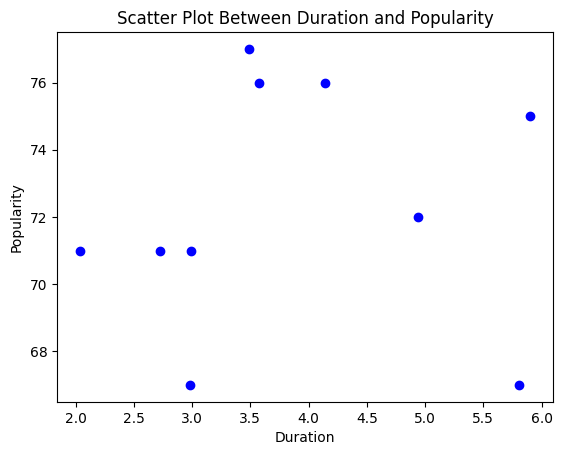

In [22]:
# Data
x = df['Duration']
y = df['Popularity']
# Create the scatter plot
plt.scatter(x, y, marker="o", color="blue")
# Customize the chart
plt.title("Scatter Plot Between Duration and Popularity")
plt.xlabel("Duration")
plt.ylabel("Popularity")
# Display the chart
plt.show()